# Quantum Computing

## SuperDense Coding protocol

Message sent: 01
Message received: 01


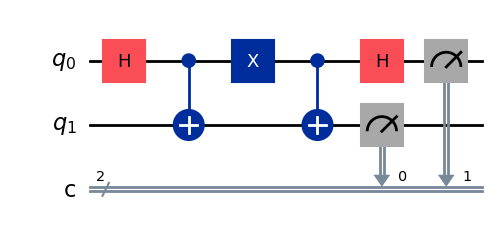

In [4]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import Aer


# Create the quantum circuit
qc = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits for measurement

# Shared Entanglement
qc.h(0)         #
qc.cx(0, 1)

# At this point, qubits are in |Φ+> = (|00> + |11>)/√2

# --- Encoding
#   00 -> I
#   01 -> X
#   10 -> Z
#   11 -> ZX
message = "01"

if message == "00":
    pass  # Do nothing
elif message == "01":
    qc.x(0)
elif message == "10":
    qc.z(0)
elif message == "11":
    qc.z(0)
    qc.x(0)


# Decoding
qc.cx(0, 1)
qc.h(0)

# Measure in computational basis
qc.measure([0, 1], [1, 0])

#  Simulation
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# Results
print("Message sent:", message)
print("Message received:", max(counts, key=counts.get))
plot_histogram(counts)
plt.show()

# Draw circuit
qc.draw("mpl")